In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError("Gpu not")
print('Gpu found at {} '.format(device_name))

Gpu found at /device:GPU:0 


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Nov 27 18:33:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   28C    P0    52W / 400W |    632MiB / 40536MiB |      1%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import pickle

In [5]:
%cd /content/gdrive/MyDrive/Master/Fall 22/DS Project/CornDataSet
!ls

/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
 MobileNet_UfR_0-00_wThreshold_500epoch_1fold_no_accuracyGraph.png
 MobileNet_UfR_0-00_wThreshold_500epoch_1fold_no_LossGraph.png
 MobileNet_UfR_0-00_wThreshold_500epoch_2fold_no_accuracyGraph.png
 MobileNet_UfR_0-00_wThreshold_500epoch_2fold_no_LossGraph.png
 MobileNet_UfR_0-00_wThreshold_500epoch_3fold_no_accuracyGraph.png
 MobileNet_UfR_0-00_wThreshold_500epoch_3fold_no_LossGraph.png
 MobileNet_UfR_0-00_wThreshold_500epoch_4fold_no_accuracyGraph.png
 MobileNet_UfR_0-00_wThreshold_500epoch_4fold_no_LossGraph.png
 MobileNet_UfR_0-00_wThreshold_500epoch_5fold_no_accuracyGraph.png
 MobileNet_UfR_0-00_wThreshold_500epoch_5fold_no_LossGraph.png
 MobileNet_UfR_0-00_wThreshold_Kfold_history_fold_1.csv
 MobileNet_UfR_0-00_wThreshold_Kfold_history_fold_2.csv
 MobileNet_UfR_0-00_wThreshold_Kfold_history_fold_3.csv
 MobileNet_UfR_0-00_wThreshold_Kfold_history_fold_4.csv
 MobileNet_UfR

In [6]:
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

In [7]:
import numpy as np
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)
y = np.array(Y_train)

In [8]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import classification_report
from keras.layers.core import Dense, Flatten
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam


import matplotlib.pyplot as plt
import keras.optimizers
import numpy as np
import pandas as pd
import os
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, GlobalAveragePooling2D,Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import mobilenet_v2
from keras.layers import Input
import numpy as np
from keras import Model
import tensorflow as tf

In [9]:
def plotGraphs(history,fold_no,epochs):
  %cd '/content/gdrive/MyDrive/Graphs/'
 #summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{fold_no} model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet_UfR_1-00_wThreshold_{epochs}epoch_{fold_no}fold_no_accuracyGraph.png')
  plt.show()
  #summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'{fold_no} model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet_UfR_1-00_wThreshold_{epochs}epoch_{fold_no}fold_no_LossGraph.png')
  plt.show()

In [11]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, valLoss_threshold, valAccuracy_threshold):
        super(MyThresholdCallback, self).__init__()
        self.valLoss_threshold = valLoss_threshold
        self.valAccuracy_threshold = valAccuracy_threshold
        

    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs["val_loss"] 
        val_accuracy = logs["val_accuracy"]
        if (val_loss <= self.valLoss_threshold) and (val_accuracy >= self.valAccuracy_threshold):
            #print(f'Total Epochs Completed: {logs["Epoch"]}')
            self.model.stop_training = True

my_callback = MyThresholdCallback(valLoss_threshold=1.0,valAccuracy_threshold=0.9)            

Epoch 1/500
 6/73 [=>............................] - ETA: 10s - loss: 0.6338 - accuracy: 0.7552

73/73 [==============================] - 17s 169ms/step - loss: 0.2527 - accuracy: 0.9156 - val_loss: 12.5488 - val_accuracy: 0.3494
Epoch 2/500
73/73 [==============================] - 12s 162ms/step - loss: 0.1568 - accuracy: 0.9589 - val_loss: 31.5955 - val_accuracy: 0.3052
Epoch 3/500
73/73 [==============================] - 11s 154ms/step - loss: 0.1121 - accuracy: 0.9580 - val_loss: 28.5511 - val_accuracy: 0.3039
Epoch 4/500
73/73 [==============================] - 11s 152ms/step - loss: 0.0834 - accuracy: 0.9771 - val_loss: 16.4158 - val_accuracy: 0.3974
Epoch 5/500
73/73 [==============================] - 13s 174ms/step - loss: 0.0878 - accuracy: 0.9697 - val_loss: 25.4120 - val_accuracy: 0.3039
Epoch 6/500
73/73 [==============================] - 11s 153ms/step - loss: 0.0567 - accuracy: 0.9805 - val_loss: 15.5582 - val_accuracy: 0.4286
Epoch 7/500
73/73 [==============================] - 12s 158ms/step - loss: 0.0599 - accuracy: 0.9835 - val_loss: 8.6864 - val_accuracy: 0.528

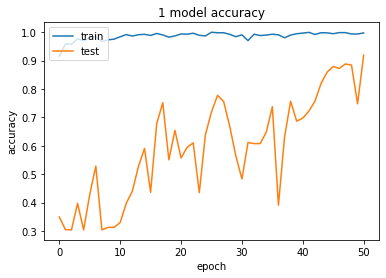

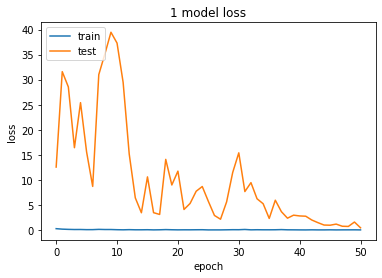

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_1-00_wThreshold_epochs_500/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 1: loss of 0.1862172931432724; accuracy of 96.26623392105103%
49/49 [==============================] - 2s 16ms/step
Classification report on Training data fold-1:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       928
           1       0.94      1.00      0.97       954
           2       0.85      0.94      0.89       410
           3       0.98      0.89      0.93       788

    accuracy                           0.95      3080
   macro avg       0.94      0.95      0.94      3080
weighted avg       0.96      0.95      0.95      3080

13/13 [==============================] - 0s 24ms/step
Classification report on Test data:-1
              precision    recall  f1-score   support

       

73/73 [==============================] - 17s 174ms/step - loss: 0.2520 - accuracy: 0.9065 - val_loss: 2.8622 - val_accuracy: 0.7896
Epoch 2/500
73/73 [==============================] - 11s 157ms/step - loss: 0.1621 - accuracy: 0.9455 - val_loss: 20.3951 - val_accuracy: 0.4221
Epoch 3/500
73/73 [==============================] - 11s 153ms/step - loss: 0.1292 - accuracy: 0.9606 - val_loss: 24.7290 - val_accuracy: 0.3039
Epoch 4/500
73/73 [==============================] - 11s 155ms/step - loss: 0.0817 - accuracy: 0.9719 - val_loss: 33.1771 - val_accuracy: 0.3104
Epoch 5/500
73/73 [==============================] - 12s 160ms/step - loss: 0.0749 - accuracy: 0.9732 - val_loss: 17.3845 - val_accuracy: 0.3403
Epoch 6/500
73/73 [==============================] - 11s 157ms/step - loss: 0.0769 - accuracy: 0.9758 - val_loss: 23.4341 - val_accuracy: 0.3156
Epoch 7/500
73/73 [==============================] - 12s 158ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 5.8534 - val_accuracy: 0.6013

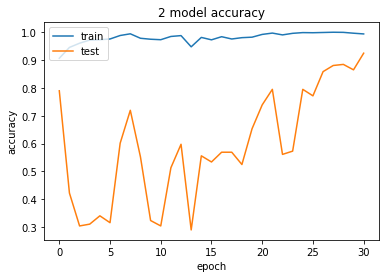

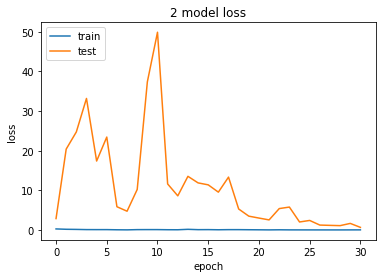

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_1-00_wThreshold_epochs_500/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 2: loss of 0.5252734422683716; accuracy of 92.6948070526123%
49/49 [==============================] - 2s 16ms/step
Classification report on Training data fold-2:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       928
           1       1.00      0.99      0.99       954
           2       0.85      0.98      0.91       410
           3       0.88      0.97      0.93       788

    accuracy                           0.94      3080
   macro avg       0.93      0.95      0.94      3080
weighted avg       0.95      0.94      0.94      3080

13/13 [==============================] - 0s 16ms/step
Classification report on Test data:-2
              precision    recall  f1-score   support

        

73/73 [==============================] - 16s 168ms/step - loss: 0.2597 - accuracy: 0.9061 - val_loss: 16.1897 - val_accuracy: 0.5870
Epoch 2/500
73/73 [==============================] - 12s 159ms/step - loss: 0.1167 - accuracy: 0.9589 - val_loss: 8.9218 - val_accuracy: 0.6195
Epoch 3/500
73/73 [==============================] - 12s 162ms/step - loss: 0.0930 - accuracy: 0.9701 - val_loss: 7.6319 - val_accuracy: 0.5896
Epoch 4/500
73/73 [==============================] - 12s 160ms/step - loss: 0.0799 - accuracy: 0.9805 - val_loss: 3.8219 - val_accuracy: 0.6753
Epoch 5/500
73/73 [==============================] - 11s 154ms/step - loss: 0.1077 - accuracy: 0.9671 - val_loss: 8.3982 - val_accuracy: 0.6013
Epoch 6/500
73/73 [==============================] - 12s 160ms/step - loss: 0.0843 - accuracy: 0.9745 - val_loss: 2.7217 - val_accuracy: 0.6338
Epoch 7/500
73/73 [==============================] - 12s 160ms/step - loss: 0.1002 - accuracy: 0.9649 - val_loss: 4.7664 - val_accuracy: 0.5519
Epo

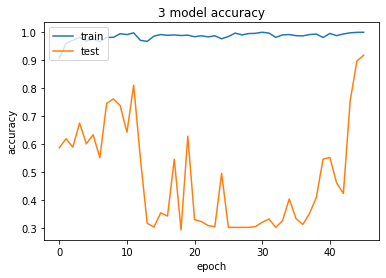

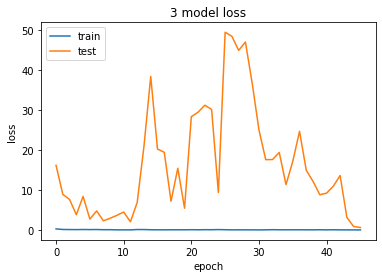

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_1-00_wThreshold_epochs_500/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 3: loss of 0.2324383705854416; accuracy of 97.07792401313782%
49/49 [==============================] - 1s 16ms/step
Classification report on Training data fold-3:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       928
           1       0.99      1.00      0.99       954
           2       0.94      0.98      0.96       410
           3       0.87      0.97      0.92       788

    accuracy                           0.95      3080
   macro avg       0.95      0.96      0.95      3080
weighted avg       0.96      0.95      0.95      3080

13/13 [==============================] - 0s 16ms/step
Classification report on Test data:-3
              precision    recall  f1-score   support

       

73/73 [==============================] - 16s 158ms/step - loss: 0.2153 - accuracy: 0.9208 - val_loss: 6.1303 - val_accuracy: 0.7117
Epoch 2/500
73/73 [==============================] - 11s 152ms/step - loss: 0.1816 - accuracy: 0.9442 - val_loss: 1.7993 - val_accuracy: 0.7013
Epoch 3/500
73/73 [==============================] - 11s 149ms/step - loss: 0.1081 - accuracy: 0.9662 - val_loss: 5.4477 - val_accuracy: 0.5727
Epoch 4/500
73/73 [==============================] - 11s 151ms/step - loss: 0.0852 - accuracy: 0.9727 - val_loss: 22.2120 - val_accuracy: 0.3234
Epoch 5/500
73/73 [==============================] - 11s 149ms/step - loss: 0.0766 - accuracy: 0.9749 - val_loss: 25.3680 - val_accuracy: 0.3364
Epoch 6/500
73/73 [==============================] - 11s 147ms/step - loss: 0.0571 - accuracy: 0.9818 - val_loss: 33.0494 - val_accuracy: 0.3247
Epoch 7/500
73/73 [==============================] - 11s 150ms/step - loss: 0.0746 - accuracy: 0.9749 - val_loss: 36.6219 - val_accuracy: 0.3039


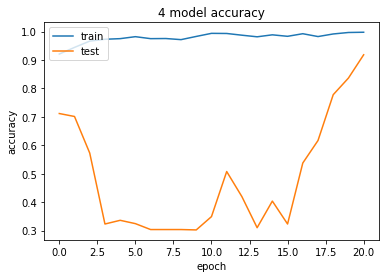

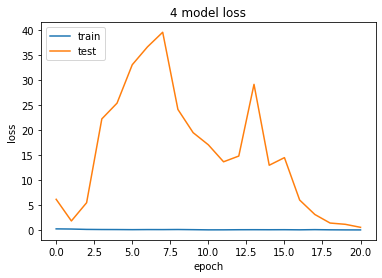

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_1-00_wThreshold_epochs_500/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 4: loss of 0.3385070562362671; accuracy of 95.61688303947449%
49/49 [==============================] - 2s 17ms/step
Classification report on Training data fold-4:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       928
           1       0.95      0.98      0.96       954
           2       0.83      0.94      0.88       410
           3       0.97      0.96      0.96       788

    accuracy                           0.95      3080
   macro avg       0.94      0.95      0.94      3080
weighted avg       0.95      0.95      0.95      3080

13/13 [==============================] - 0s 16ms/step
Classification report on Test data:-4
              precision    recall  f1-score   support

       

73/73 [==============================] - 16s 168ms/step - loss: 0.2465 - accuracy: 0.9126 - val_loss: 13.1812 - val_accuracy: 0.5649
Epoch 2/500
73/73 [==============================] - 12s 161ms/step - loss: 0.1016 - accuracy: 0.9628 - val_loss: 3.1150 - val_accuracy: 0.7169
Epoch 3/500
73/73 [==============================] - 11s 153ms/step - loss: 0.1502 - accuracy: 0.9498 - val_loss: 28.1616 - val_accuracy: 0.3091
Epoch 4/500
73/73 [==============================] - 11s 154ms/step - loss: 0.1277 - accuracy: 0.9550 - val_loss: 32.8698 - val_accuracy: 0.3039
Epoch 5/500
73/73 [==============================] - 11s 154ms/step - loss: 0.0725 - accuracy: 0.9753 - val_loss: 27.5982 - val_accuracy: 0.3909
Epoch 6/500
73/73 [==============================] - 12s 161ms/step - loss: 0.1209 - accuracy: 0.9632 - val_loss: 24.9624 - val_accuracy: 0.3156
Epoch 7/500
73/73 [==============================] - 12s 160ms/step - loss: 0.0747 - accuracy: 0.9766 - val_loss: 36.4506 - val_accuracy: 0.307

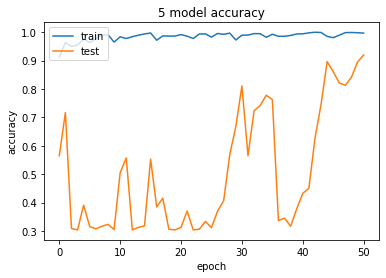

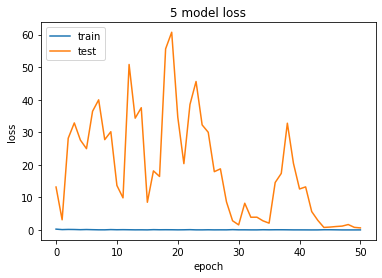

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_1-00_wThreshold_epochs_500/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 5: loss of 0.352176308631897; accuracy of 93.66883039474487%
49/49 [==============================] - 2s 16ms/step
Classification report on Training data fold-5:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       928
           1       0.89      1.00      0.94       954
           2       0.99      0.79      0.88       410
           3       0.93      0.90      0.92       788

    accuracy                           0.95      3080
   macro avg       0.95      0.92      0.93      3080
weighted avg       0.95      0.95      0.94      3080

13/13 [==============================] - 0s 16ms/step
Classification report on Test data:-5
              precision    recall  f1-score   support

        

In [12]:
inputs = X_train
targets = y
acc_per_fold = []
loss_per_fold = []
num_folds = 5
epochs = 500
train = 100

kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
  base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

  CLASSES = 4
  x = base_model.output
  x = GlobalAveragePooling2D(name='avg_pool')(x)
  x = Dropout(0.4)(x)
  predictions = Dense(CLASSES, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  for layer in model.layers:
    layer.trainable = True  # should be True

  optm = optimizers.Adam(learning_rate=0.001)    
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer= optm,
              metrics=['accuracy']
              )
  
  logs = f'/content/gdrive/MyDrive/Logs/MobileNet_Kfold/MobileNet_UfR_1-00_wThreshold_fold_no_{fold_no}/'

  
  history = model.fit(inputs, targets, batch_size=32, epochs=epochs, validation_split=0.25, callbacks= [my_callback],
                          use_multiprocessing=True)
  
  plotGraphs(history,fold_no,epochs)
  
  %cd f'/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_1-00_wThreshold_epochs_{epochs}/'
  hist_df = pd.DataFrame(history.history)  
  hist_csv_file = f'MobileNet_UfR_1-00_wThreshold_Kfold_history_fold_{fold_no}.csv'
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  y_train_pred = model.predict(X_train, batch_size=64, verbose=1)
  y_train_pred_bool = np.argmax(y_train_pred, axis=1)
  print(f"Classification report on Training data fold-{fold_no}:")
  print(classification_report(y, y_train_pred_bool))

  y_pred = model.predict(X_test, batch_size=64, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print(f"Classification report on Test data:-{fold_no}")
  print(classification_report(Y_test, y_pred_bool))

  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Validation Loss: {loss_per_fold[i]} - Validation Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------') 

In [ ]:
# freezing 25% of the bottom layers